In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input, Concatenate,
                                     Average, Maximum, Add, Subtract, Multiply,
                                    GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D)
from tensorflow.keras.datasets import cifar10

In [2]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

X_train = X_train / 255.0
X_test = X_test / 255.0

# изменение размерности массива в 4D массив
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

170500096/170498071 [==============================] - 2s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

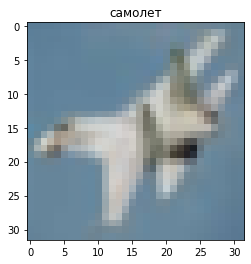

In [5]:
N = 10

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu')) 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten()) 

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))

model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [7]:
hist = model.fit(X_train, y_train,
                 epochs=20,
                 batch_size=16,
                 validation_data=(X_test, y_test),
                 verbose=1)

test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

Epoch 1/20
3125/3125 [==============================] - 45s 4ms/step - loss: 2.1321 - accuracy: 0.2030 - val_loss: 1.6775 - val_accuracy: 0.3951
Epoch 2/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.6656 - accuracy: 0.3922 - val_loss: 1.3914 - val_accuracy: 0.4921
Epoch 3/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4488 - accuracy: 0.4728 - val_loss: 1.2409 - val_accuracy: 0.5539
Epoch 4/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3320 - accuracy: 0.5201 - val_loss: 1.1468 - val_accuracy: 0.5924
Epoch 5/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2219 - accuracy: 0.5656 - val_loss: 1.0947 - val_accuracy: 0.6168
Epoch 6/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1451 - accuracy: 0.5969 - val_loss: 1.1035 - val_accuracy: 0.6067
Epoch 7/20
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0881 - accuracy: 0.6107 - val_loss: 1.0153 - val_ac

In [9]:
y_pred = model.predict(X_test)

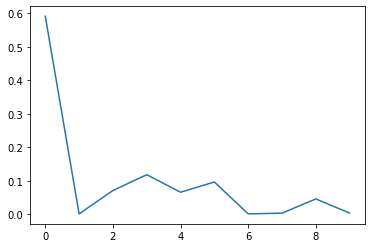

[0.5908041  0.00158665 0.07125401 0.11839733 0.06613015 0.09666061
 0.00144096 0.003782   0.04611617 0.00382802]


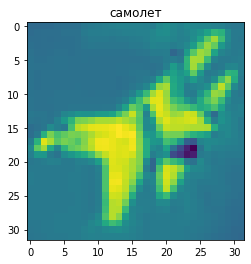

In [16]:
N = 10
plt.plot(y_pred[N][:])
plt.show()
print(y_pred[N][:])
plt.imshow(X_test[N][:,:,0])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

# 2. Оценим рост точности при увеличении ширины сети (больше фильтров т.е. количества каналов на свёртках)

In [18]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu')) 
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten()) 
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [19]:
hist = model_2.fit(X_train, y_train,
                 epochs=10,
                 batch_size=16,
                 validation_data=(X_test, y_test),
                 verbose=1)

test_loss, test_metric = model_2.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

Epoch 1/10
3125/3125 [==============================] - 17s 5ms/step - loss: 2.0769 - accuracy: 0.2326 - val_loss: 1.5825 - val_accuracy: 0.4292
Epoch 2/10
3125/3125 [==============================] - 16s 5ms/step - loss: 1.5878 - accuracy: 0.4242 - val_loss: 1.2983 - val_accuracy: 0.5339
Epoch 3/10
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3472 - accuracy: 0.5158 - val_loss: 1.1741 - val_accuracy: 0.5804
Epoch 4/10
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1651 - accuracy: 0.5847 - val_loss: 1.0109 - val_accuracy: 0.6443
Epoch 5/10
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0426 - accuracy: 0.6332 - val_loss: 0.9164 - val_accuracy: 0.6798
Epoch 6/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9366 - accuracy: 0.6688 - val_loss: 0.8392 - val_accuracy: 0.7097
Epoch 7/10
3125/3125 [==============================] - 16s 5ms/step - loss: 0.8586 - accuracy: 0.6979 - val_loss: 0.8018 - val_ac

**Вывод**: С увеличением ширины сети качество упало - с 0.7665 до 0.7567

# 3. Оценим рост точности при увеличении глубины сети (больше слоев конволюций-пулингов)

In [20]:
model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu')) 
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten()) 
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

In [21]:
hist = model_3.fit(X_train, y_train,
                 epochs=10,
                 batch_size=16,
                 validation_data=(X_test, y_test),
                 verbose=1)

test_loss, test_metric = model_3.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

Epoch 1/10
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2103 - accuracy: 0.1538 - val_loss: 1.8015 - val_accuracy: 0.3355
Epoch 2/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.8145 - accuracy: 0.3221 - val_loss: 1.5349 - val_accuracy: 0.4239
Epoch 3/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6022 - accuracy: 0.4090 - val_loss: 1.3833 - val_accuracy: 0.4939
Epoch 4/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4453 - accuracy: 0.4691 - val_loss: 1.2607 - val_accuracy: 0.5402
Epoch 5/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3213 - accuracy: 0.5253 - val_loss: 1.1428 - val_accuracy: 0.5881
Epoch 6/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.2246 - accuracy: 0.5631 - val_loss: 1.0933 - val_accuracy: 0.6087
Epoch 7/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1514 - accuracy: 0.5887 - val_loss: 1.0520 - val_ac

**Вывод**: При увеличении глубины сети (увеличении количества слоёв конволюций-пулингов) качество упало ещё сильнее - до 0.6885.

# 4. *сравнение с точностью полносвязной сети для этой выборки

In [22]:
model_4 = Sequential()
model_4.add(Flatten(input_shape=X_train.shape[1:]))
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()

model_4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_26 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
____________________________________________

In [23]:
hist = model_4.fit(X_train, y_train,
                 epochs=10,
                 batch_size=16,
                 validation_data=(X_test, y_test),
                 verbose=1)

test_loss, test_metric = model_4.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

Epoch 1/10
3125/3125 [==============================] - 7s 2ms/step - loss: 2.0482 - accuracy: 0.2546 - val_loss: 1.7689 - val_accuracy: 0.3670
Epoch 2/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8115 - accuracy: 0.3506 - val_loss: 1.6799 - val_accuracy: 0.4140
Epoch 3/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.7390 - accuracy: 0.3831 - val_loss: 1.6383 - val_accuracy: 0.4173
Epoch 4/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.7115 - accuracy: 0.3927 - val_loss: 1.6054 - val_accuracy: 0.4348
Epoch 5/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.6655 - accuracy: 0.4087 - val_loss: 1.5799 - val_accuracy: 0.4410
Epoch 6/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.6380 - accuracy: 0.4224 - val_loss: 1.5538 - val_accuracy: 0.4531
Epoch 7/10
3125/3125 [==============================] - 7s 2ms/step - loss: 1.6162 - accuracy: 0.4269 - val_loss: 1.5269 - val_accuracy:

**Вывод**: Полносвзная сеть обеспечила самое низкое качество.